In [6]:
import os

import numpy as np
from typing import List, Tuple, Any, Dict

import seaborn as sns
import matplotlib.pyplot as plt
import torch
from pathlib import Path
import json

import project_path

In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
DIR_ASSIGNMENTS = "../data/model_output/exp_v04"
DIR_ATTENTION_GROUND_TRUTH = "../data/prompt/exp_v04"

# Read Data

## Ground Truth

In [12]:
def read_artificial_ground_truth(folder_ground_truth: str) -> Dict[str, Dict[str, Any]]:
    """Read ground-truth attention created when creating prompts.
    
    It returns a dictionary where the keys are the prompt file names (e.g.
    prompt_1.txt), so that from the model output we can derive the ground-truth
    attention.
    """
    ground_truth = {}
    for file in os.listdir(folder_ground_truth):
        if file.endswith(".json"):
            with open(os.path.join(folder_ground_truth, file), "r") as f:
                ground_truth[file.replace(".json", "")] = json.load(f)
    return ground_truth

ground_truth = read_artificial_ground_truth(DIR_ATTENTION_GROUND_TRUTH)
ground_truth["prompt_1"]["attention_weights"]

[False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True]

## Model Output

In [4]:
from attwizard.script.utils_model import read_model_output

data = read_model_output(DIR_ASSIGNMENTS)

In [11]:
data[0].keys()

dict_keys(['name', 'metadata', 'matrix'])

In [28]:
data[0]["metadata"].keys()

dict_keys(['tokens_all', 'tokens_prompt', 'tokens_generated', 'text_generated', 'text_prompt', 'config_options', 'generation_time_seconds'])

In [12]:
print(data[0]["metadata"]["text_generated"])

d = "world"
e = False
f = 9
b = 0
c = "world"
a = False
e = min( b, )
c = c
b = e
f = min( e, f, c, )
f = e * d
f = b + f
b = e
f = max( f, )
a = b + b
a = abs( b, )
a = min( c, b, )
c = max( b, c, d, )
e = c / 5 + c
if (a == 
    
    "World"):
    s = False
else:
    f = "World"
d = "World"
if (c + 3 ==
    
    d * 5):
    print('\b')
else:
    e = False
b = str( c)[ : 2 ]
f = len( str( c))
if a in (
  
    b):
    f = 0 - f
print( a


prompt_9.txt_Salesforce_codegen-16B-mono


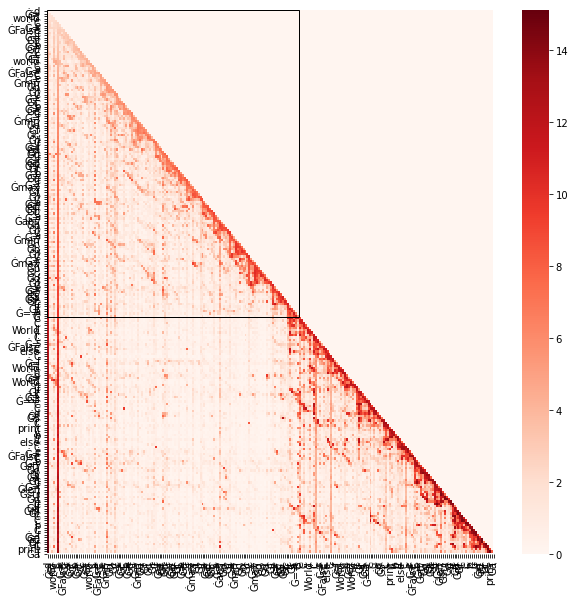

prompt_4.txt_Salesforce_codegen-16B-mono


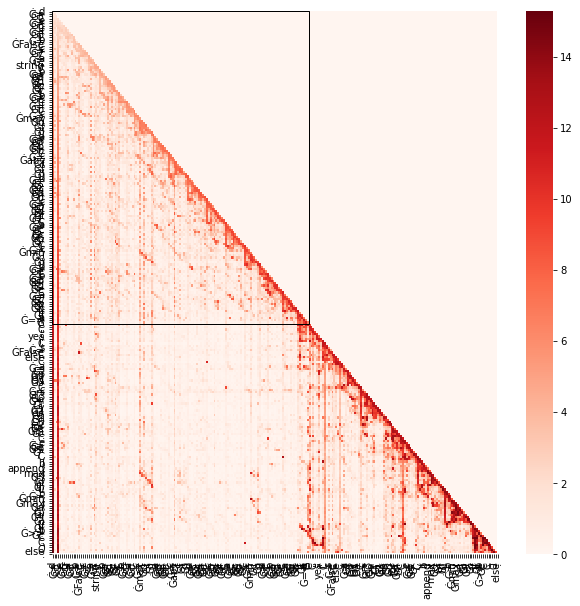

prompt_5.txt_Salesforce_codegen-16B-mono


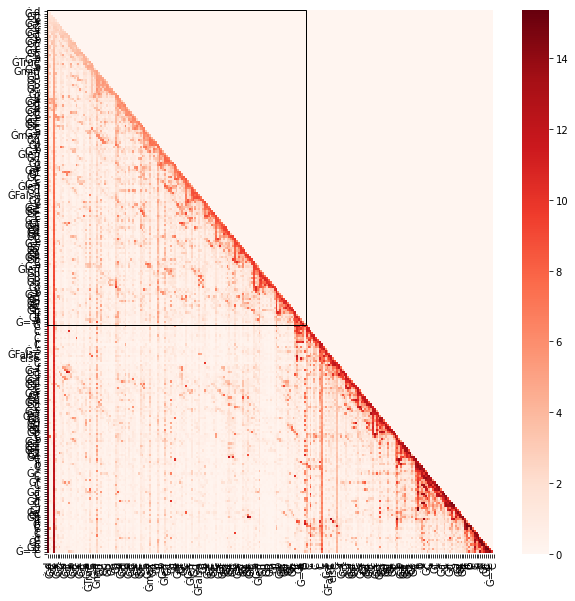

prompt_1.txt_Salesforce_codegen-16B-mono


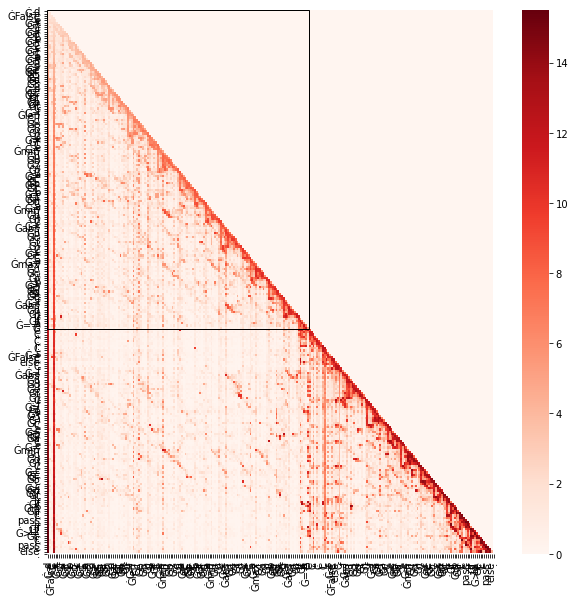

prompt_3.txt_Salesforce_codegen-16B-mono


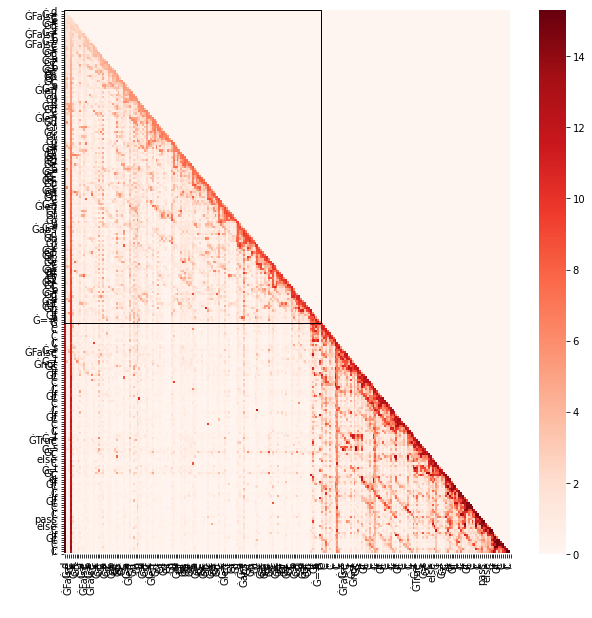

In [6]:
from attwizard.decoder import heatmap_visualize

for record in data[:5]:
    print("=" * 80)
    print(record["name"])
    heatmap_visualize(
        attention_matrix=record["matrix"],
        token_names=record["metadata"]["tokens_all"],
        n_input_tokens=len(record["metadata"]["tokens_prompt"])
    )
    plt.show()

## Visualize Heatmaps for first prediction

In [27]:
from ipywidgets import interact, fixed
from attwizard.decoder import get_attention_representation
from attwizard.aligner import map_to_char_level
from attwizard.aligner import tokenize_char_level

from codeattention.source_code import SourceCode


def show_attention_on_code(
        attention_matrix: np.ndarray,
        tokens: List[str],
        text_generated: str,
        token_pos: int,
        include_predecessors: bool = False):
    """Show the attention map of a specific token position."""
    print(f"You see the weights of attention to represent the token: {tokens[token_pos]}")
    print("And all the PREDECESSORS TOKENS as WELL (summed attention)")
    print(f"This token representation is used to predict all the tokens after this.")
    # extract the weights for that token representation
    if include_predecessors:
        att_matrix_c_token = attention_matrix[:token_pos, :]
        att_weights = att_matrix_c_token.sum(axis=0)  # <----- focus here
    else:
        att_weights = attention_matrix[token_pos, :]
    att_weights = list(att_weights.numpy()) \
        if isinstance(att_weights, torch.Tensor) else list(att_weights)
    # append 1 because the last token is unattended, it is simply generated 
    # attending the previous ones.
    att_weights.append(0)
    print(len(att_weights))
    # convert the attntion to char level (easier to compare and display)
    att_weights_char_level = map_to_char_level(
        tokens=tokens,
        att_weights=att_weights,
        raw_text=text_generated,
        #distribution_fn="equal_share",
        distribution_fn="replication",
        special_char_mapping={
            "Ġ": ' ',
            "Ċ": '\n',
        }
    )
    char_tokens = tokenize_char_level(text_generated)
    # display
    python_sc = SourceCode(char_tokens)
    fig, ax = python_sc.show_with_weights(
        weights=att_weights_char_level,
        show_line_numbers=True
    )
    return fig, ax
    
POSITION = 0    
chosen_record = data[POSITION]

gpt_tokens_labels = [
    (t[1], t[0]) for t in list(enumerate(chosen_record["metadata"]["tokens_all"]))
]    

interact(
    show_attention_on_code, 
    token_pos=gpt_tokens_labels,
    attention_matrix=fixed(chosen_record["matrix"]),
    tokens=fixed(chosen_record["metadata"]["tokens_all"]),
    text_generated=fixed(chosen_record["metadata"]["text_generated"]),
    include_predecessors=fixed(False)
    )

interactive(children=(Dropdown(description='token_pos', options=(('d', 0), ('Ġ=', 1), ('Ġ"', 2), ('world', 3),…

<function __main__.show_attention_on_code(attention_matrix: numpy.ndarray, tokens: List[str], text_generated: str, token_pos: int, include_predecessors: bool = False)>

You see the weights of attention to represent the token: a
And all the PREDECESSORS TOKENS as WELL (summed attention)
This token representation is used to predict all the tokens after this.
229


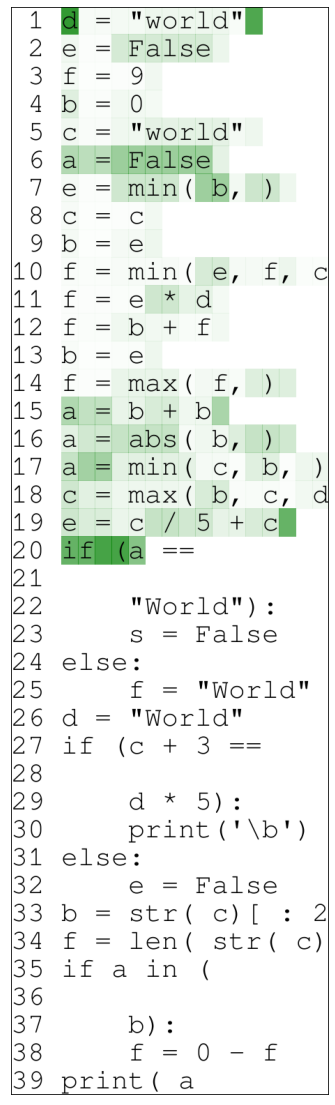

You see the weights of attention to represent the token: a
And all the PREDECESSORS TOKENS as WELL (summed attention)
This token representation is used to predict all the tokens after this.
235


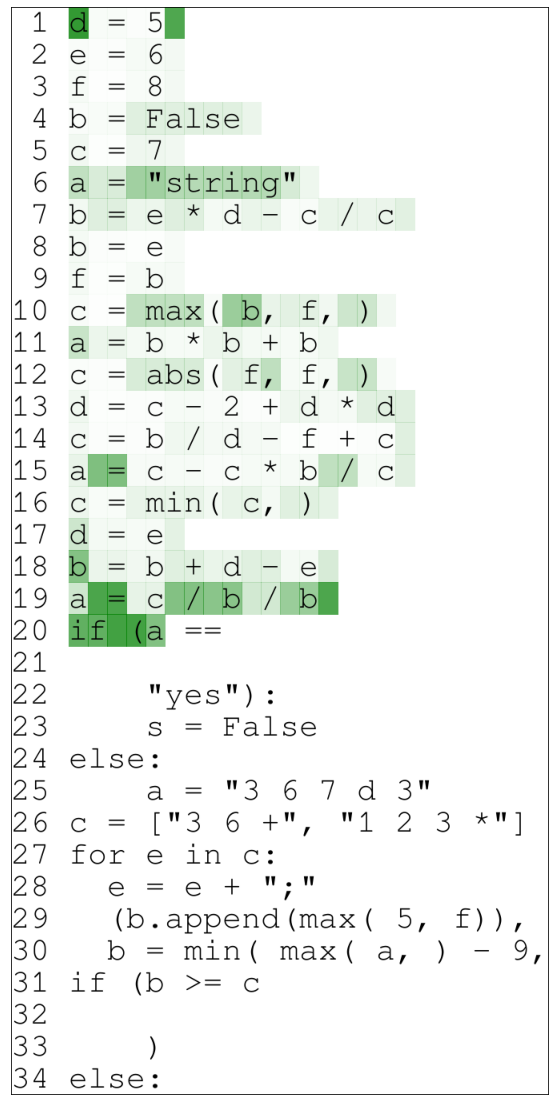

You see the weights of attention to represent the token: a
And all the PREDECESSORS TOKENS as WELL (summed attention)
This token representation is used to predict all the tokens after this.
237


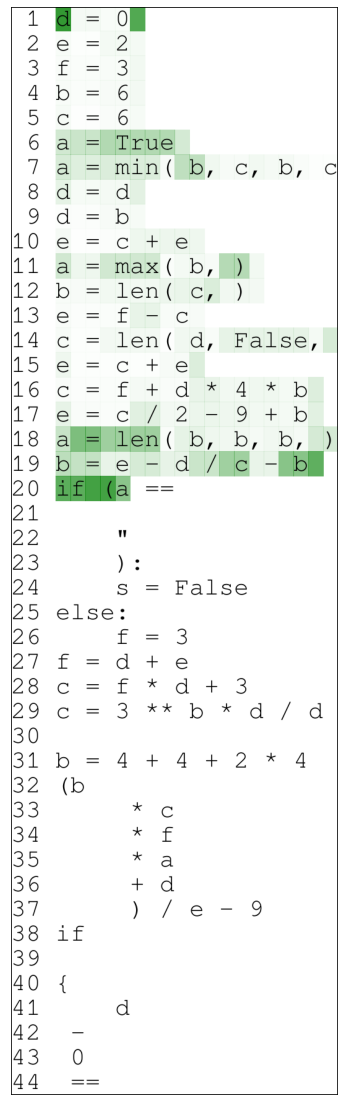

You see the weights of attention to represent the token: a
And all the PREDECESSORS TOKENS as WELL (summed attention)
This token representation is used to predict all the tokens after this.
241


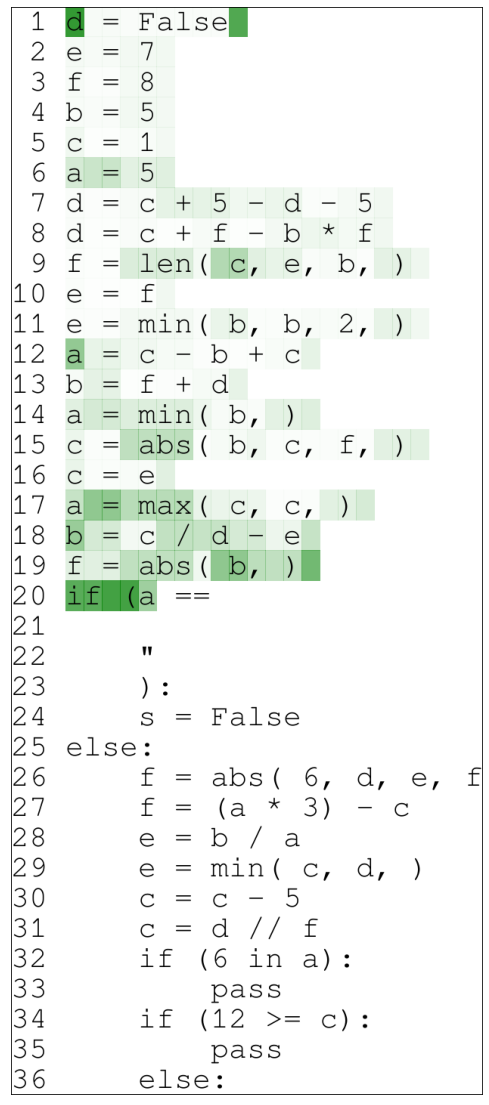

You see the weights of attention to represent the token: a
And all the PREDECESSORS TOKENS as WELL (summed attention)
This token representation is used to predict all the tokens after this.
235


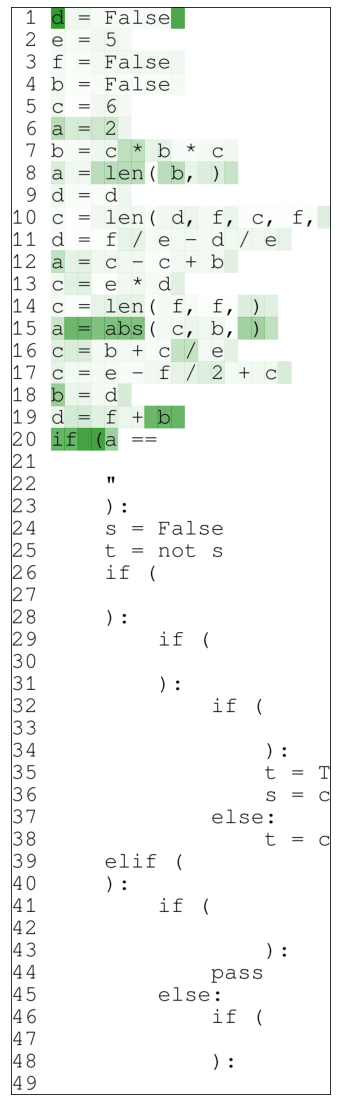

You see the weights of attention to represent the token: a
And all the PREDECESSORS TOKENS as WELL (summed attention)
This token representation is used to predict all the tokens after this.
221


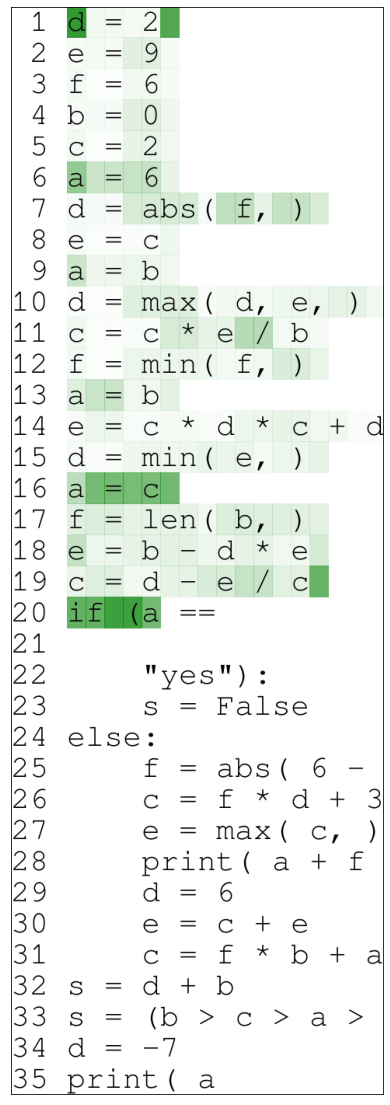

You see the weights of attention to represent the token: a
And all the PREDECESSORS TOKENS as WELL (summed attention)
This token representation is used to predict all the tokens after this.
245


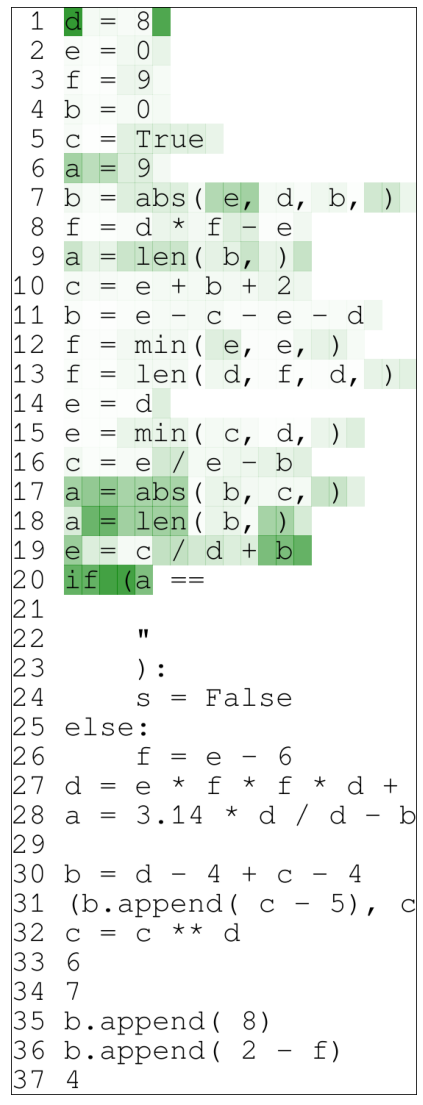

You see the weights of attention to represent the token: a
And all the PREDECESSORS TOKENS as WELL (summed attention)
This token representation is used to predict all the tokens after this.
257


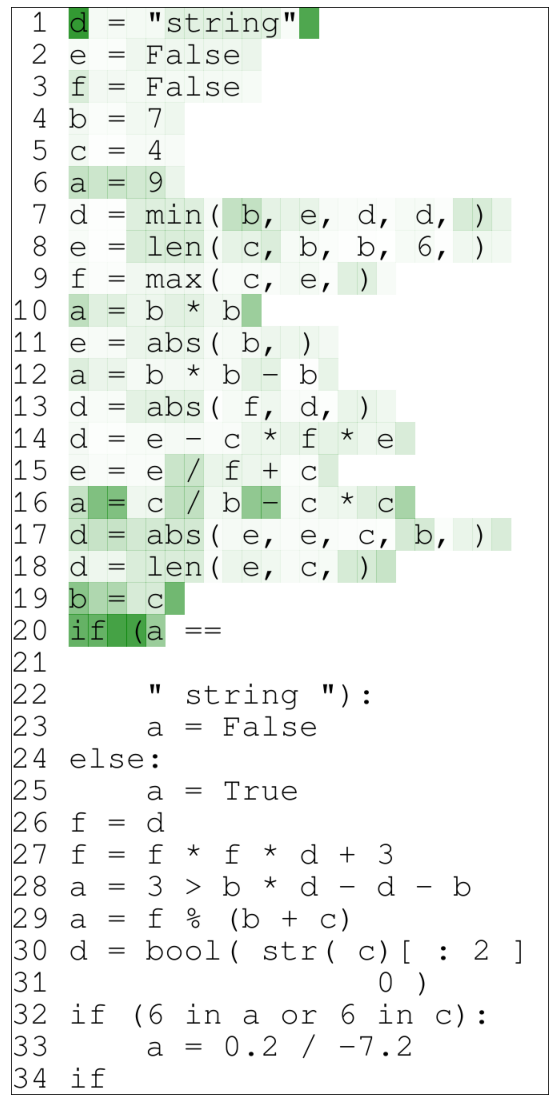

You see the weights of attention to represent the token: a
And all the PREDECESSORS TOKENS as WELL (summed attention)
This token representation is used to predict all the tokens after this.
251


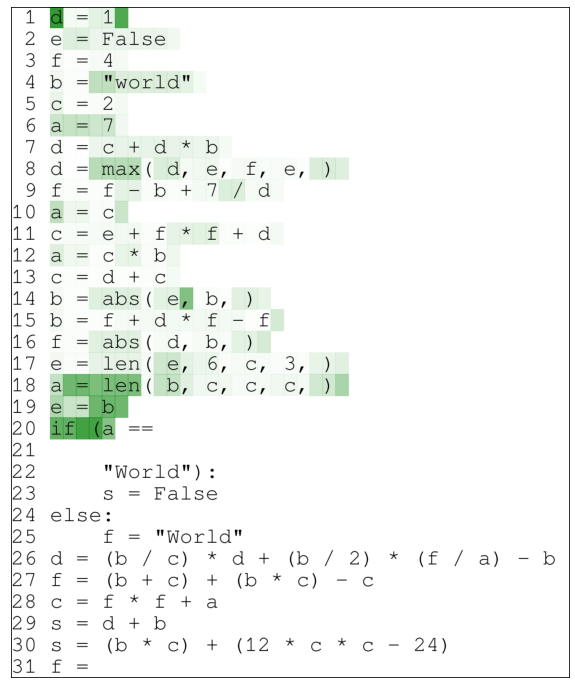

You see the weights of attention to represent the token: a
And all the PREDECESSORS TOKENS as WELL (summed attention)
This token representation is used to predict all the tokens after this.
241


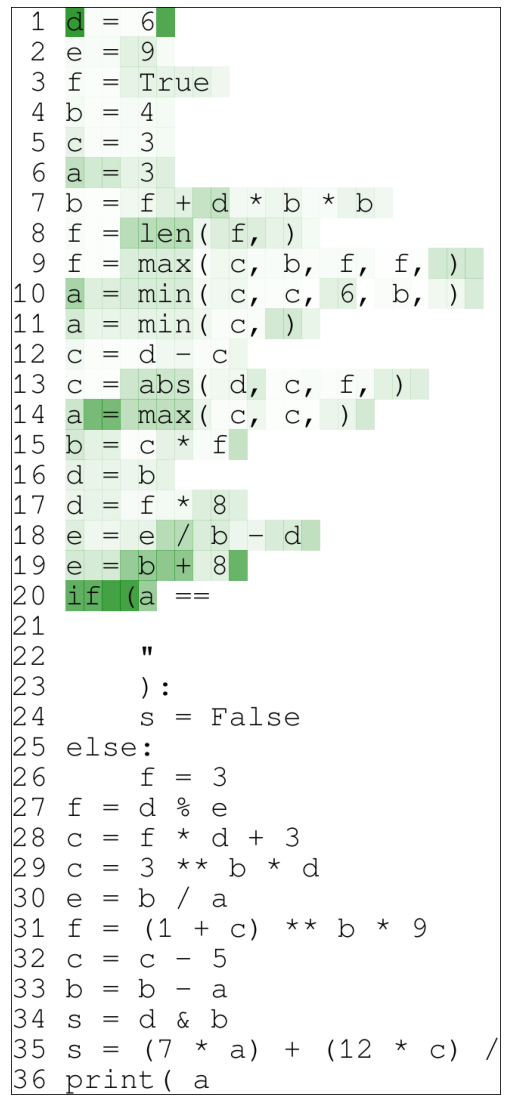

In [32]:
for chosen_record in data:
    show_attention_on_code(
        attention_matrix=chosen_record["matrix"],
        token_pos=len(chosen_record["metadata"]["tokens_prompt"]) - 3,
        tokens=chosen_record["metadata"]["tokens_all"],
        text_generated=chosen_record["metadata"]["text_generated"],
        include_predecessors=False)
    plt.show()

## Compare with Statement-Level Ground Truth

We consider the variable in the last statement the target variable, since we are trying to find something to relate to it with the `==` operator.
Thus, we hypotesize that all statement with that variable are somehow relevant for the prediction.

We then chceck how much the total attention given by the last statement to the other statements is alined with this logic: aka more attention to statement with the target variable.

We use the ROC curve to visualize the performance of binary classifier based on the attention score, since the attention scores are continuous whereas the relevance of the ground truth is either 0 for irrelevant or 1 for relevant.

In [44]:
    
def show_roc_curve(ground_truth_attention, att_all_statements):
    fpr, tpr, _ = roc_curve(ground_truth_attention, att_all_statements)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

prompt_9.txt_Salesforce_codegen-16B-mono
[False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, False, False, True]
[131.10538, 27.658464, 21.19894, 15.953956, 30.072094, 40.950672, 76.94212, 12.6849785, 14.95034, 50.129463, 25.44614, 18.821106, 11.587763, 35.236137, 43.87924, 59.78318, 56.222794, 70.5815, 132.39487, 125.30684]
prompt_9 - AUC: 0.7333333333333334


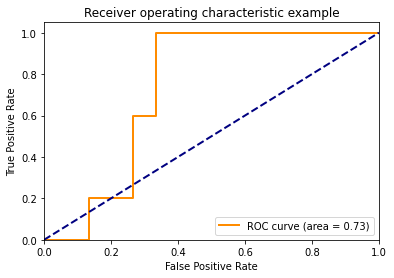

228 228


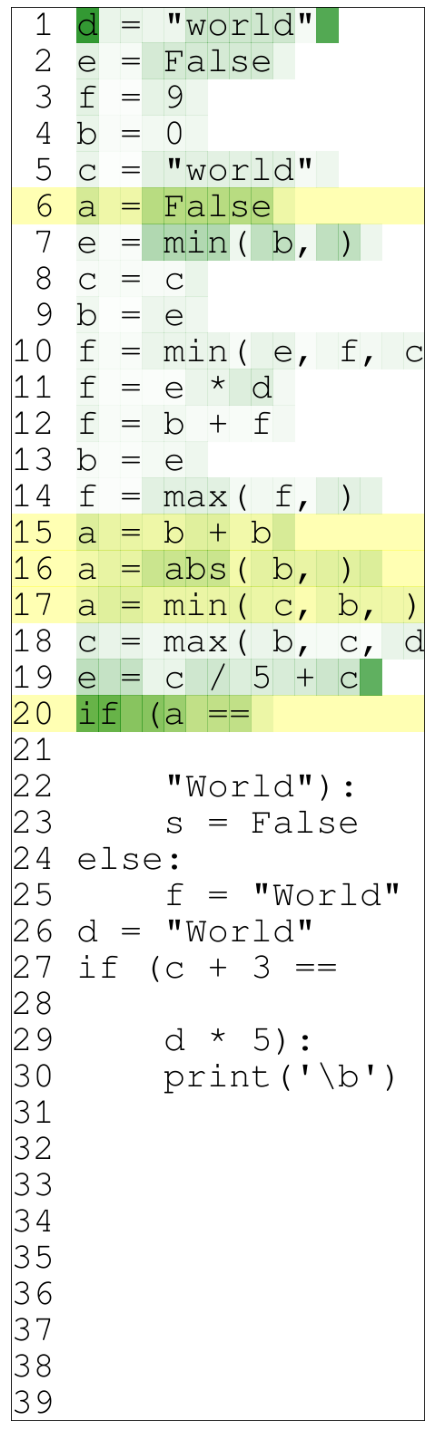

prompt_4.txt_Salesforce_codegen-16B-mono
[False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, True, True]
[114.60628, 19.307705, 14.444563, 22.14915, 16.895382, 61.514793, 59.075504, 10.172794, 10.725493, 92.071014, 29.78304, 55.111584, 35.870193, 27.343758, 45.377525, 49.423206, 26.040829, 62.743202, 154.35437, 129.72255]
prompt_4 - AUC: 0.7866666666666666


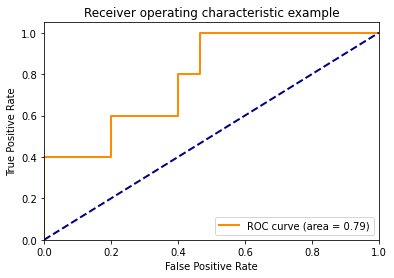

234 234


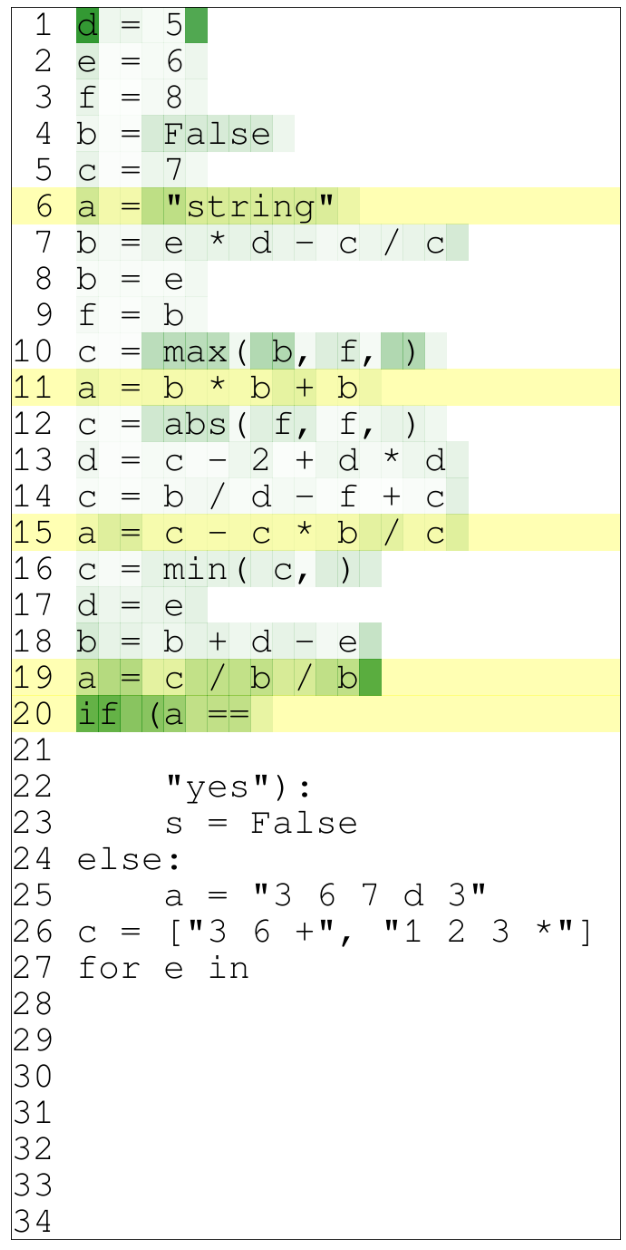

prompt_5.txt_Salesforce_codegen-16B-mono
[False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, True, False, True]
[112.82395, 19.91528, 15.844835, 11.377959, 12.288034, 35.256615, 106.044586, 18.289295, 10.004717, 19.794775, 54.04789, 40.04165, 19.451149, 42.256405, 17.12801, 40.212616, 44.6134, 99.25649, 163.20006, 125.57764]
prompt_5 - AUC: 0.8266666666666667


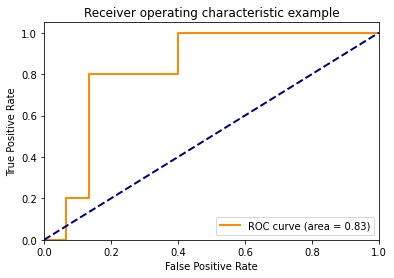

236 236


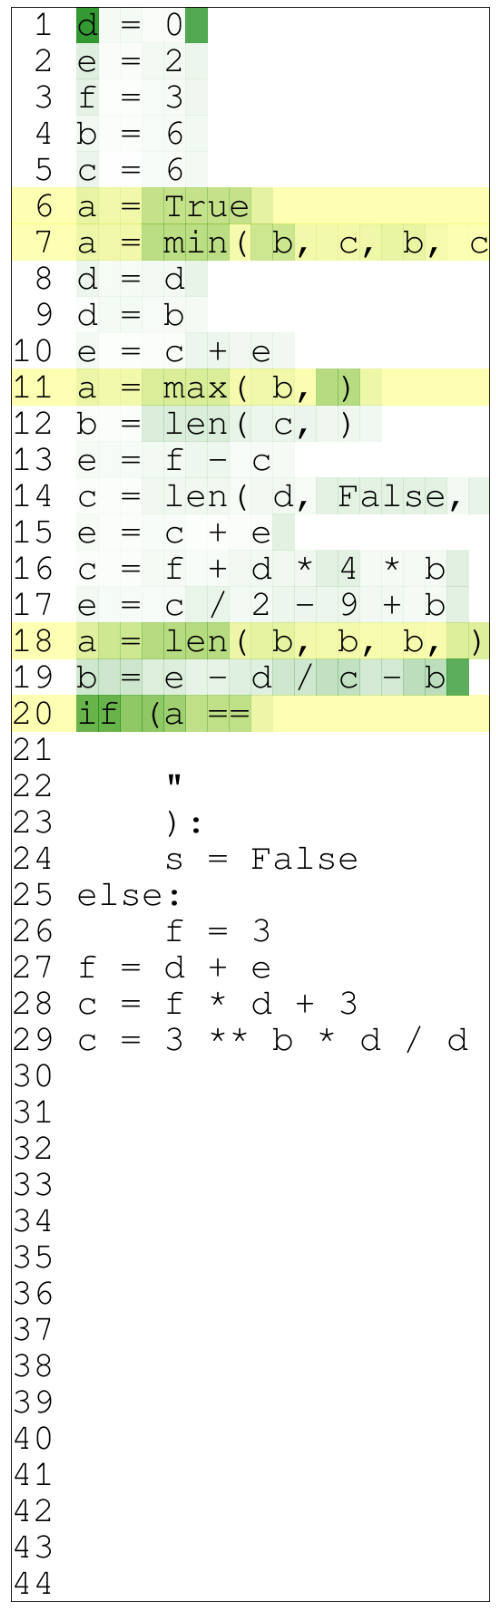

prompt_1.txt_Salesforce_codegen-16B-mono
[False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, True, False, False, True]
[126.71173, 27.825325, 15.468222, 14.259314, 14.305208, 26.006933, 42.406178, 26.894272, 84.684204, 11.333984, 58.08952, 32.942924, 18.664478, 40.395252, 51.035637, 18.727615, 64.812996, 77.32072, 136.22464, 127.98086]
prompt_1 - AUC: 0.6266666666666667


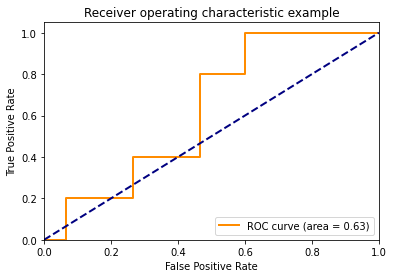

240 240


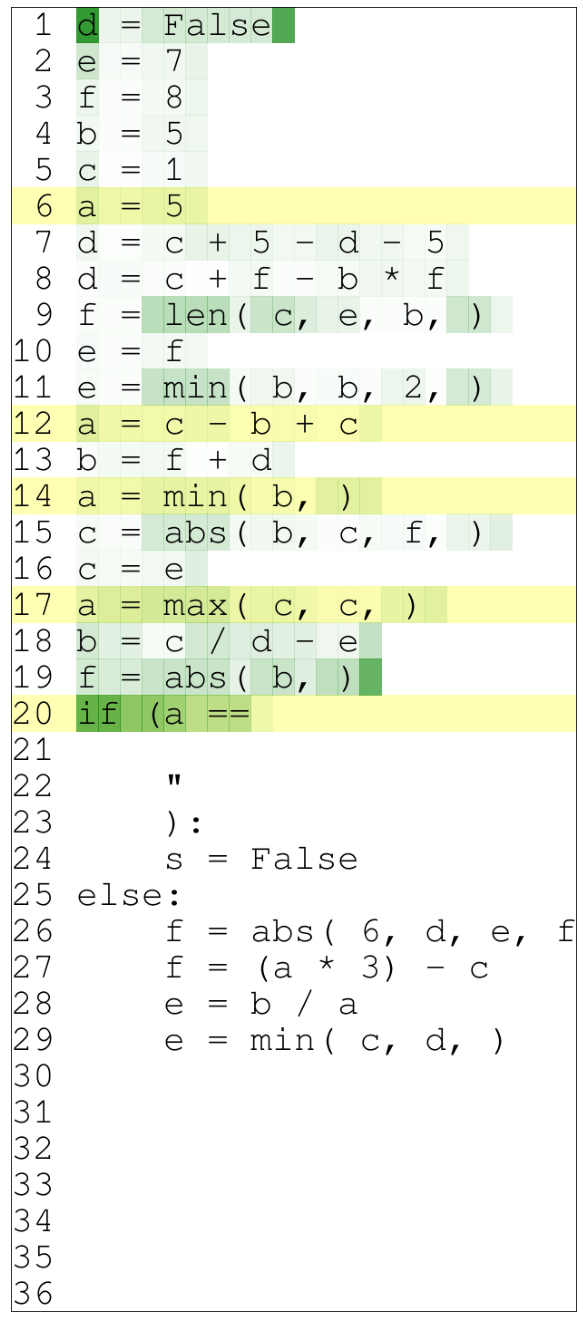

prompt_3.txt_Salesforce_codegen-16B-mono
[False, False, False, False, False, True, False, True, False, False, False, True, False, False, True, False, False, False, False, True]
[122.6993, 23.444757, 19.598671, 12.752162, 19.01801, 28.125008, 32.978035, 81.78052, 15.960621, 53.531155, 34.71953, 36.22596, 21.417305, 40.474907, 82.946945, 41.25739, 44.501717, 42.38234, 114.79558, 128.29872]
prompt_3 - AUC: 0.7333333333333334


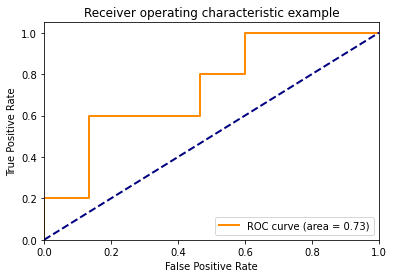

234 234


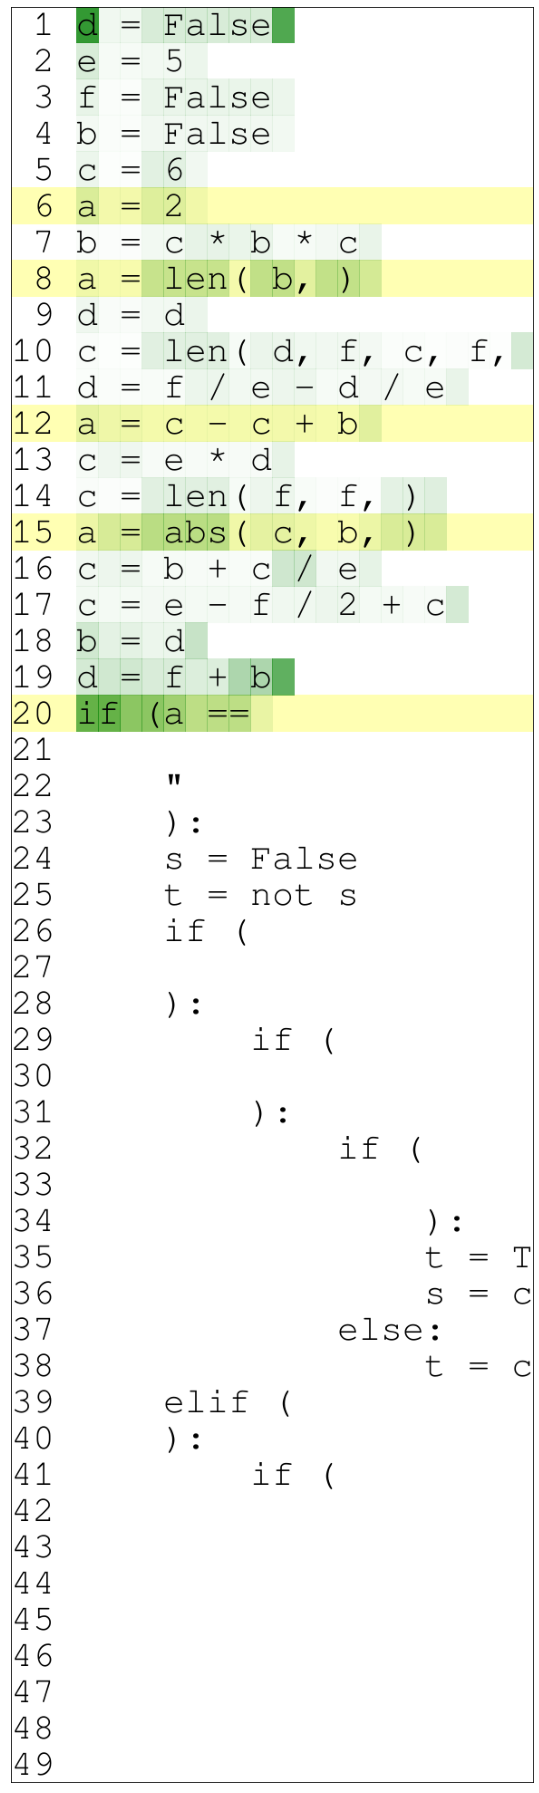

prompt_8.txt_Salesforce_codegen-16B-mono
[False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, True, False, False, False, True]
[108.66002, 19.539333, 13.439482, 13.594864, 11.444288, 28.631033, 61.64607, 12.348455, 16.03615, 52.513016, 44.718575, 38.66616, 23.653587, 31.563103, 35.938972, 51.356285, 70.15044, 55.588585, 114.78095, 121.94022]
prompt_8 - AUC: 0.5066666666666667


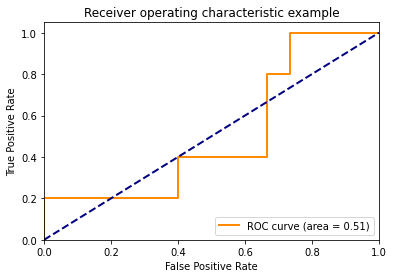

220 220


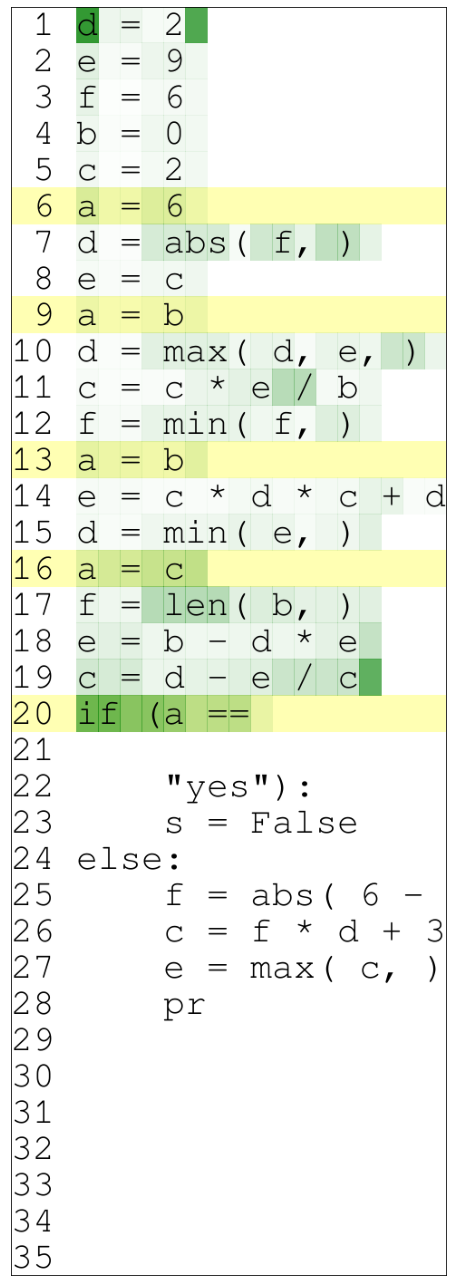

prompt_2.txt_Salesforce_codegen-16B-mono
[False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True]
[119.890854, 21.842354, 22.561964, 15.443804, 32.268, 33.05045, 98.59798, 30.773746, 65.559746, 28.11005, 29.51608, 51.58306, 35.05038, 13.557272, 35.934433, 39.63372, 67.35036, 84.749084, 144.66467, 132.41298]
prompt_2 - AUC: 0.7733333333333333


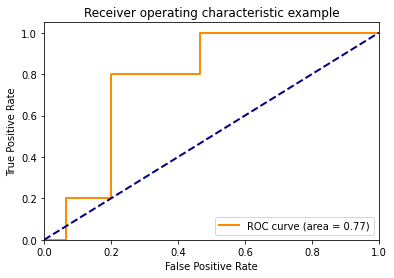

244 244


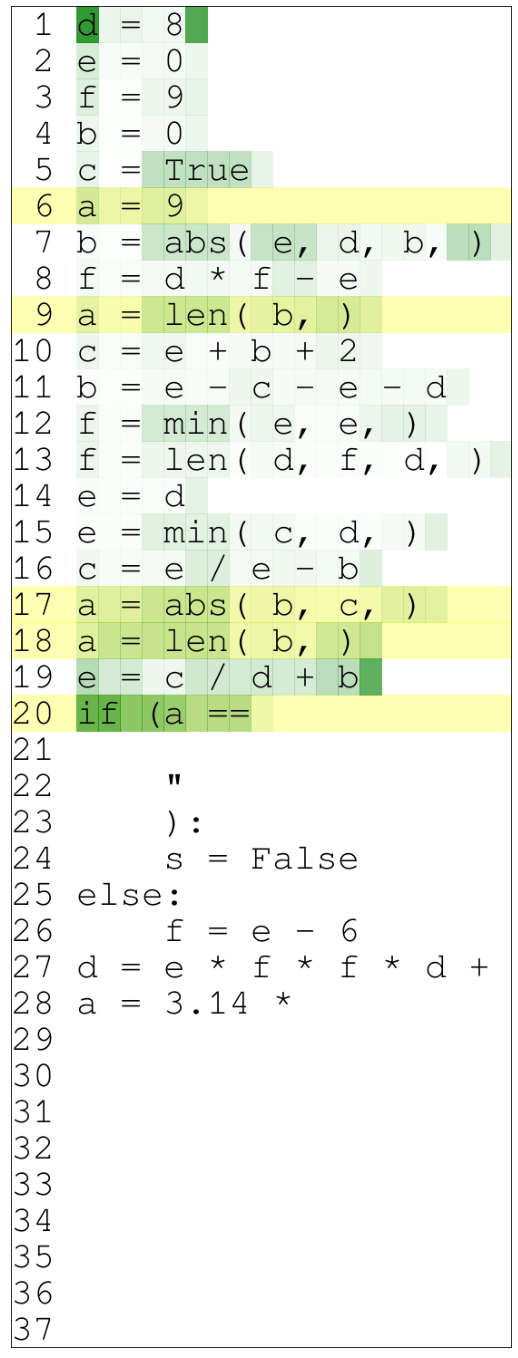

prompt_6.txt_Salesforce_codegen-16B-mono
[False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, True]
[139.90492, 39.513588, 32.273502, 21.384548, 14.311644, 36.256184, 105.173836, 61.026814, 36.926804, 35.8273, 35.781563, 29.161394, 32.47894, 36.150757, 44.566704, 72.51283, 57.832474, 88.83699, 109.40976, 137.62132]
prompt_6 - AUC: 0.5066666666666667


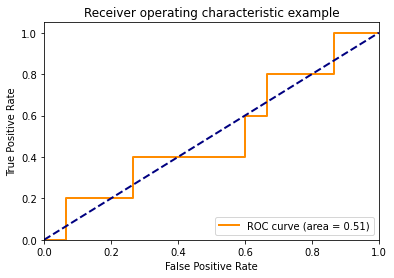

256 256


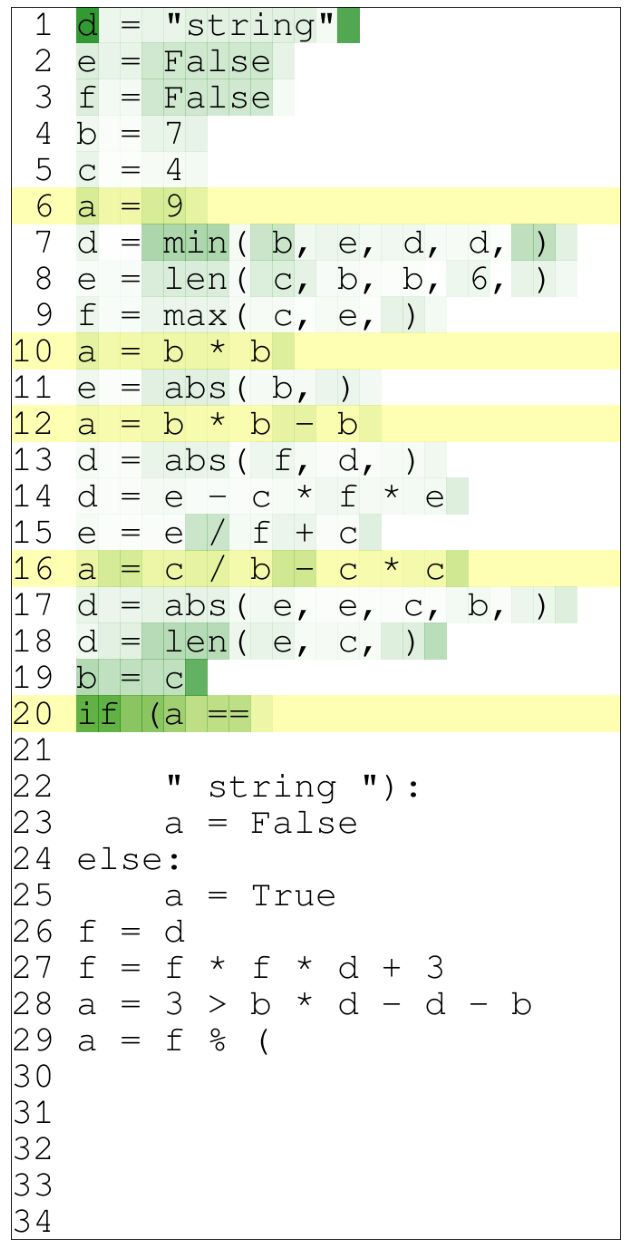

prompt_0.txt_Salesforce_codegen-16B-mono
[False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, True, False, True]
[123.16831, 38.24633, 17.501863, 50.08474, 16.181736, 32.837204, 38.527008, 100.56506, 33.065853, 21.20468, 34.631737, 18.023273, 12.136236, 58.60743, 29.418102, 40.109104, 84.52211, 120.80572, 111.45329, 134.17102]
prompt_0 - AUC: 0.52


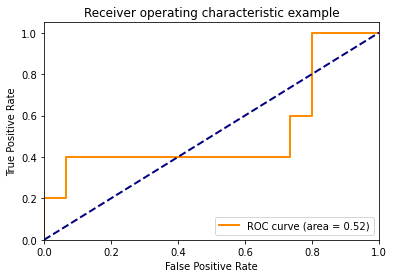

250 250


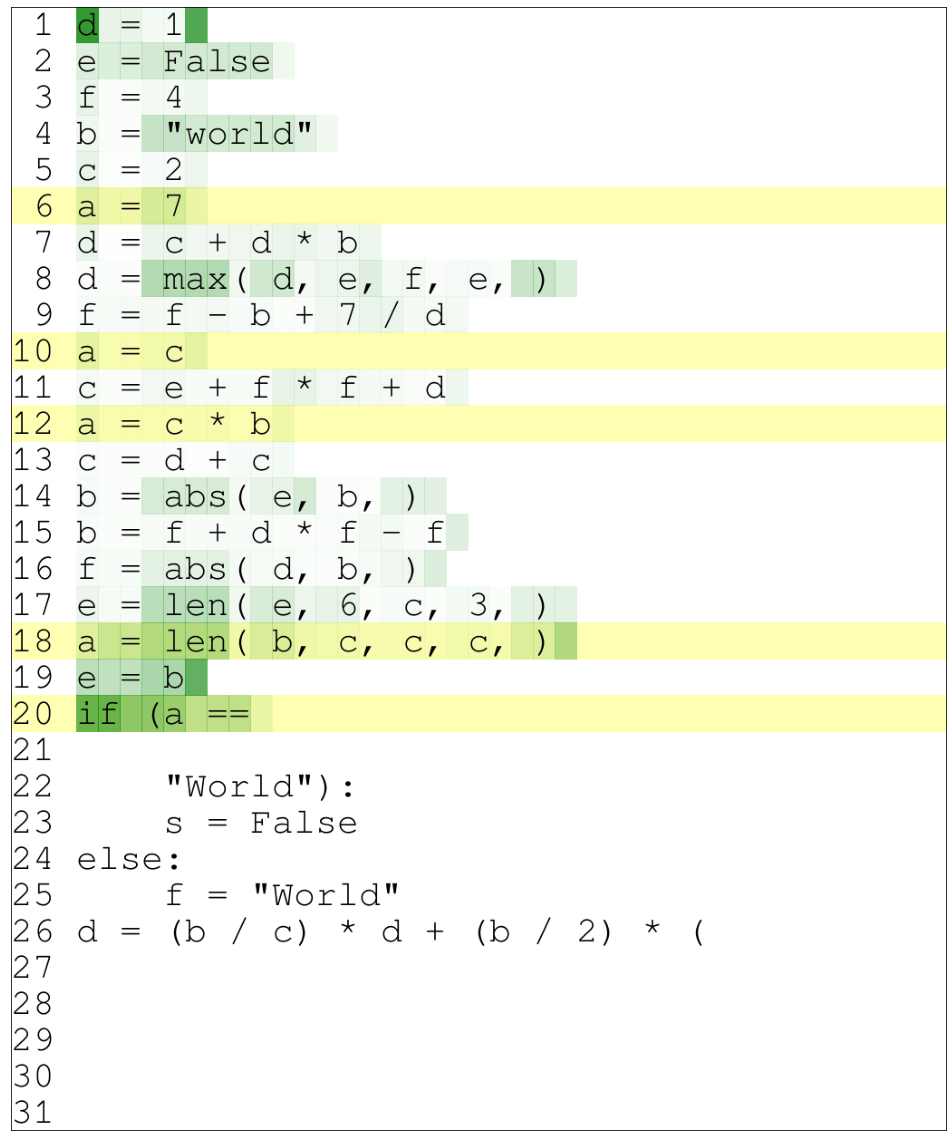

prompt_7.txt_Salesforce_codegen-16B-mono
[False, False, False, False, False, True, False, False, False, True, True, False, False, True, False, False, False, False, False, True]
[115.660324, 24.325674, 26.67048, 13.548359, 15.8910885, 28.177868, 57.074654, 68.67886, 71.68973, 55.85504, 47.100178, 17.36944, 55.44633, 53.380814, 29.699905, 19.419233, 33.558563, 84.02394, 118.63486, 128.91873]
prompt_7 - AUC: 0.6133333333333334


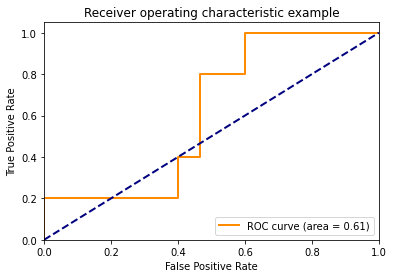

240 240


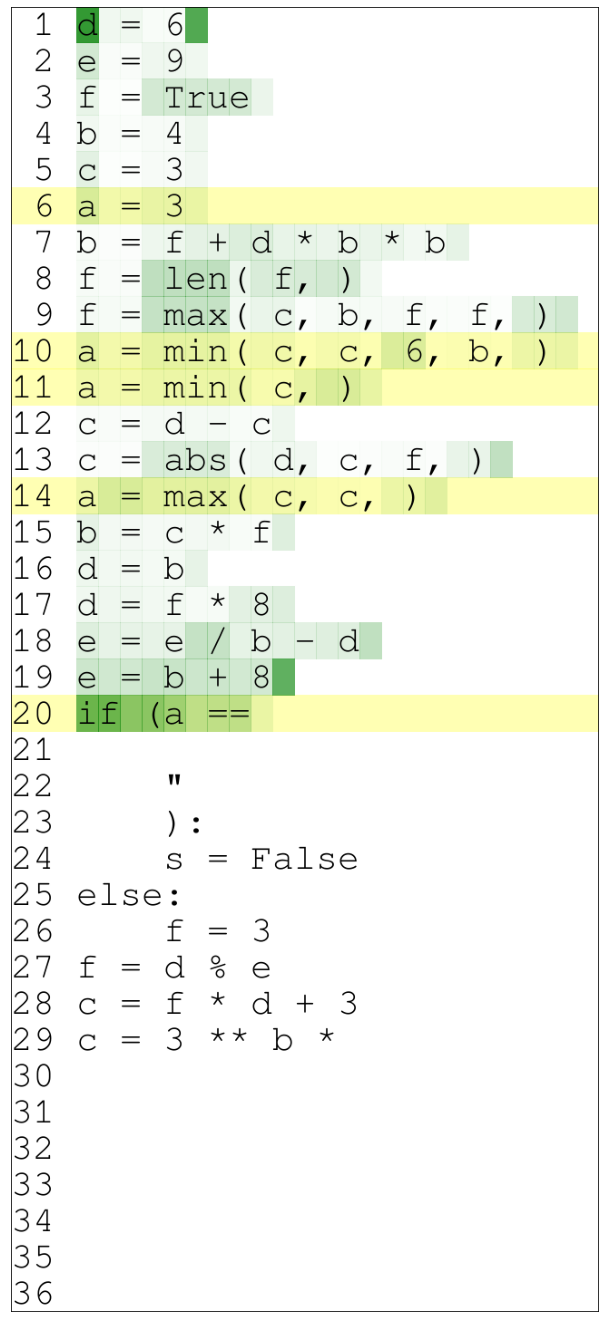

In [69]:
# GET STATEMENT-LEVEL ATTENTION FROM LAST STATMENT WEIGHTS
# we focus on the attention paid by the last statement
# we want to see how much those toknes are paying ot each of the previous 
# statements
from sklearn.metrics import roc_curve, auc, roc_auc_score
from attwizard.aligner import map_to_char_level
from attwizard.aligner import tokenize_char_level
from codeattention.source_code import SourceCode


for chosen_record in data[:]:
    # get its ground-truth
    basename = chosen_record["name"][:chosen_record["name"].find(".")]
    ground_truth_attention = ground_truth[basename]["attention_weights"]
    print("=" * 80)
    print(chosen_record["name"])

    # get the attention weights for the last statment of the prompt
    att_matrix = chosen_record["matrix"]

    tokens_prompt = chosen_record["metadata"]["tokens_prompt"]
    idx_last_token_prompt = len(tokens_prompt) - 1
    idx_last_new_line_char = len(tokens_prompt) - tokens_prompt[::-1].index("Ċ") - 1
    idx_first_char_last_statement = idx_last_new_line_char + 1

    # attention weigths of last statement
    att_weights_on_prompt_from_last_statement = \
        att_matrix[
            idx_first_char_last_statement:idx_last_token_prompt + 1, :].sum(axis=0)

    # get attention on the preceeding statement
    att_all_statements = []
    remaining_tokens = tokens_prompt[:idx_first_char_last_statement]
    remaining_att_weights = att_weights_on_prompt_from_last_statement
    #print(remaining_att_weights)

    while True:
        try:
            idx_next_first_line = remaining_tokens.index("Ċ")
        except ValueError:
            # sum remaining tokens
            # print("last statement hit.")
            # attention that the tokens of the last staement put on themselves
            statement_att = remaining_att_weights.sum()
            att_all_statements.append(statement_att)
            break 
        # sum attention matrix until the next line break
        # print("sum attention of tokens:")
        # print(remaining_tokens[:idx_next_first_line + 1])
        statement_att = remaining_att_weights[: idx_next_first_line + 1].sum()
        att_all_statements.append(statement_att)
        # update remaining tokens and attention matrix
        remaining_tokens = remaining_tokens[idx_next_first_line + 1:]
        remaining_att_weights = remaining_att_weights[idx_next_first_line + 1:]

    assert len(att_all_statements) == len(ground_truth_attention)
    print(ground_truth_attention)
    print(att_all_statements)
    auc_score = roc_auc_score(ground_truth_attention, att_all_statements)
    print(f"{basename} - AUC: {auc_score}")
    show_roc_curve(ground_truth_attention, att_all_statements)

    print(len(chosen_record["metadata"]["tokens_all"][:-1]), len(att_weights_on_prompt_from_last_statement))
    # Plot the attention
    att_weights_char_level = map_to_char_level(
        tokens=chosen_record["metadata"]["tokens_all"][:-1],
        att_weights=att_weights_on_prompt_from_last_statement,
        raw_text=chosen_record["metadata"]["text_generated"][:-100],  # <--- random fix 
        #distribution_fn="equal_share",
        distribution_fn="replication",
        special_char_mapping={
            "Ġ": ' ',
            "Ċ": '\n',
        }
    )
    char_tokens = tokenize_char_level(
        chosen_record["metadata"]["text_generated"])
    # display
    python_sc = SourceCode(char_tokens)
    fig, ax = python_sc.show_with_weights(
        weights=att_weights_char_level,
        show_line_numbers=True,
        lines_highlight=[
            {"line": line_no + 1, "type": "background", "color": "yellow", "alpha": .3}
            for line_no in np.argwhere(np.array(ground_truth_attention) == True)
        ]
)
    plt.show()


## Remember important experiment conditions:
remember that this attention matrices have been created with thefollowing logic:
```yaml
attention:
  # min, max, mean, sum, keep
  strategy_reduce_head: max
  # min, max, mean, sum, keep
  strategy_reduce_layer: max
  # more_weight_to_recent
  strategy_normalize_tokens: more_weight_to_recent
```

Remember that the attention on source code and the ROC-curve refer ONLY to the LAST STATEMENT.

Remember that we are using codegen-16B-mono (the most performant) on python code.



## Visual observation
1. to generate in the current statement, the statement itself statement tends to give a lot of attention to:
  - the previous end line statement
  - the initial token
2. more informative names (in the natuaral language sense) tend to receive more attention (e.g. "strings", min, max, len, False, True, etc). More than uninformative ones (e.g. a, b, c, etc.)

# Numeric observation
1. the roc-auc socores (how well the attention weights predict the right relevant stements) are pretty low, actually random (close to 0.5)
1. the higher roc-auc socres are obtained only when the relevant statements contained informative names together with the target variable. This might mean that the attention weights are not good at connecting previous usage of the target variable, or they mostly rely on the NL info rather than the DATA FLOW information.